### Конспект лекций по SQL 
основные термины и понятия  https://stepik.org/lesson/32007/step/5?unit=12082

Архитектура СУБД - системы управления базой данных 
https://stepik.org/lesson/32007/step/7?unit=12082

Импорт и работа с тестовыми БД https://stepik.org/lesson/32008/step/1?unit=12083

Руководство по стилю языка https://www.sqlstyle.guide/ru/

**ГЛОССАРИЙ ПО ВСЕМ ТЕМАМ** https://stepik.org/lesson/583183/step/1?unit=577913

Фильтрация


In [ ]:
SELECT * from billing WHERE payer_email = "vasya@mail.ru" AND currency IN ('GBP', "USD")

# отберет все строчки для пользователя vasya с валютой операции GBP and USD

Обновление 

In [ ]:
SET SQL_SAFE_UPDATES = 0;   # эта строка поможет отключить безопасные обновления на время сеанса конкретного запроса
# при перезапуске заработает снова safe update mode

SELECT * FROM billing
	WHERE payer_email = "alex@mail.com"
    AND recipient_email = "leo@mail.com";

UPDATE billing
	SET currency ="USD"
WHERE payer_email = "alex@mail.com"
    AND recipient_email = "leo@mail.com";

In [ ]:
# обновить конкретные значения по условию

update book set
	buy = if(buy>amount, amount,buy),       # если количество заказа больше, чем есть в наличии - уменьшить до имеющегося
    price = if(buy=0, price*0.9, price);    # те книги, что не попали в заказ, снизить в цене на 10%

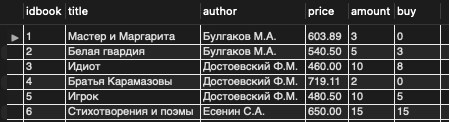

Обновить данные таблицы данными из другой таблицы

In [ ]:
# таким образом, чтобы дубликаты книг суммировались по объему, если они совпадают в обеих таблицах

UPDATE book, supply 
SET book.amount = book.amount + supply.amount
WHERE book.title = supply.title AND book.author = supply.author;

SELECT * FROM book;

Было таблица book 
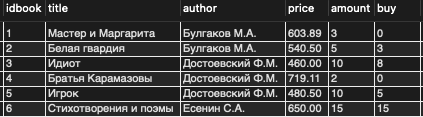

было таблица supply
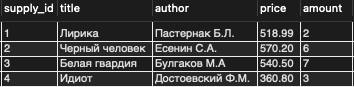

Стало book 
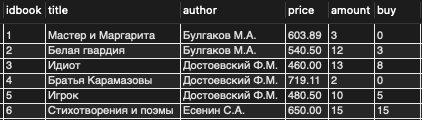

Выбор уникальных значений в столбце DISTINCT 

In [ ]:
SELECT DISTINCT author
FROM book;

Добавление позиций

In [ ]:
INSERT INTO billing VALUES (
'alex@mail.com',
"leo@mail.com",
'500.00', 'GBP',
'2010-08-20',
'Here you go!');

In [ ]:
# перечисление атрибутов для вставления (значения для которых мы будем добавлять)

INSERT INTO billing  (
	payer_email, recipient_email,
    sum, currency, billing_date)

VALUES (
'alex1@mail.com',
"leo1@mail.com",
'300.00', 'GBP',
'2010-08-20');

In [ ]:
# добавление сразу нескольких строк (кортежей) в отношение - таблицу

INSERT INTO supply (title, author, price, amount)
VALUES
    ('Лирика', 'Пастернак Б.Л.', 518.99, 2),
    ('Черный человек', 'Есенин С.А.', 570.20, 6),
    ('Белая гвардия', 'Булгаков М.А.', 540.50, 7),
    ('Идиот', 'Достоевский Ф.М.', 360.80, 3);

Добавление данных из другой таблицы

+ количество полей в таблице и количество полей в запросе должны совпадать;
+ должно существовать прямое соответствие между позицией одного и того же элемента в обоих списках, поэтому первый столбец запроса должен относиться к первому столбцу в списке столбцов таблицы, второй – ко второму столбцу и т.д.
+ типы столбцов запроса должны быть совместимы с типами данных соответствующих столбцов таблицы ( целое число можно занести в поле типа DECIMAL, обратная операция – недопустима).

In [ ]:
INSERT INTO book (title, author, price, amount) 
SELECT title, author, price, amount 
FROM supply;

SELECT * FROM book;

In [ ]:
# добавить из другой таблицы только те позиции, которые не дублируются по названию

INSERT INTO book (title, author, price, amount) 
SELECT title, author, price, amount 
FROM supply
WHERE title NOT IN (
        SELECT title 
        FROM book
      );

SELECT * FROM book;

как в sql при добавлении новой строки взять значения двух атрибутов из другой таблицы, а значение третьего атрибута задать самостоятельно? 
и сделать это в одном запросе?

In [ ]:
# данные двух первых столбцов выбираем по условию из связанных табли, а дату - назначаем самостоятельно

insert into attempt(student_id, subject_id, date_attempt)
select student_id, subject_id, now()
from subject inner join attempt using(subject_id)
    inner join student using(student_id)
    where name_student like "Баранов %" and name_subject = "Основы баз данных"
;

Пример: добавить в таблицу client нового пользователя, о котором мы знаем имя, почту и НАЗВАНИЕ города (Москва)

Но в таблице client представлены только номера городов

Зато в таблице city номера городов сопоставлены с названиями

значит - используем вложенный запрос

In [ ]:
insert into client(name_client, city_id, email)     -- добавить в соответсвующие столбцы
SELECT 'Попов Илья', city_id, 'popov@test'          -- имя, код города, почту
FROM city                                           -- код города взять из таблицы city
WHERE name_city = "Москва";                         -- в которой код города сопоставлен известному названию

Удаление

In [ ]:
# синтаксис аналогичен SELECT

DELETE FROM billing
	WHERE payer_email= '' or recipient_email='' or payer_email IS NULL or recipient_email IS NULL;

# здесь мы удаляем позиции, которые являются нулевыми или пустыми строками

In [ ]:
# удалить из таблицы supply книги тех авторов, общее количество экземпляров книг которых в таблице book превышает 10.

delete from supply
    where author in (select author from book group by author having sum(amount)>10);

Агрегация

In [ ]:
USE project_simple;
SELECT COUNT(1) FROM project;   # посчитает число строк

In [ ]:
# посчитать среднее значение в столбце
USE project_simple;
SELECT AVG(budget) FROM project;   # среднее значение по полю - передается в аргумент AVG - в данном случае по полю budget

In [ ]:
# создать столбец с разницей двух других столбцов

USE project_simple;
SELECT * FROM project; 

SELECT 
	project_start, project_finish,
    DATEDIFF(project_finish, project_start)     # функция разницы между значениями в столбце
FROM project WHERE project_finish is not null;  # отфильтруем нулевые значения (оставим только законченные проекты)


# если я захочу найти средне значение разницы днях, то есть среднее значение дней, необходимых на каждый проект 
# то я просто возьму поверх функции среднее значение

SELECT 
    AVG(DATEDIFF(project_finish, project_start))
FROM project WHERE project_finish is not null; 


#найти среднее значение в днях и максимальное значение дней, необходимых на завершение проекта
# 

USE project_simple;
SELECT * FROM project WHERE project_start <= project_finish; 

SELECT 
    AVG(DATEDIFF(project_finish, project_start)),
    MAX(DATEDIFF(project_finish, project_start))
FROM project WHERE project_start <= project_finish; 

Группировка + агрегация 

In [ ]:
# если я захочу найти среднее, максимальное и минимальное значение в разрезе каждого клиента

USE project_simple;
SELECT * FROM project WHERE project_start <= project_finish; 

SELECT 
    client_name,
    AVG(DATEDIFF(project_finish, project_start)),
    MAX(DATEDIFF(project_finish, project_start)),
    MIN(DATEDIFF(project_finish, project_start))
FROM project WHERE project_start <= project_finish
group by client_name; 

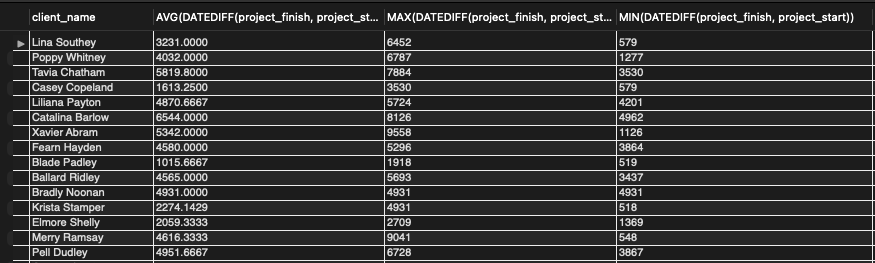

Сортировка агрегированных данных

In [ ]:
# если нужно сортировать колонку агрегированных данных

USE project_simple;
SELECT * FROM project WHERE project_start <= project_finish; 

SELECT 
    client_name,
    AVG(DATEDIFF(project_finish, project_start)) as avg_days,   # именуем каждую колонку заново, потому что это результат
    MAX(DATEDIFF(project_finish, project_start)) as max_days,
    MIN(DATEDIFF(project_finish, project_start)) as min_days
FROM project WHERE project_start <= project_finish
group by client_name
order by max_days;      # сортировка по новому столбцу максимального числа дней 
                        # по умолчанию сортирует по возрастанию

# если нужна сортировка по убыванию, то добавляем DESC (если по возрастанию ASC):
# order by max_days DESC;

Аггрегация с группировкой + отбор по условию (после) HAVING 

In [ ]:
# Найти минимальную и максимальную цену книг всех авторов, общая стоимость книг у автора больше 5000.


SELECT author,
    MIN(price) AS Минимальная_цена, 
    MAX(price) AS Максимальная_цена
FROM book
GROUP BY author
HAVING SUM(price * amount) > 5000;

Группировка по нескольким столбцам 

In [ ]:
# 

SELECT name, number_plate, violation, count(*)
FROM fine
GROUP BY name, number_plate, violation;

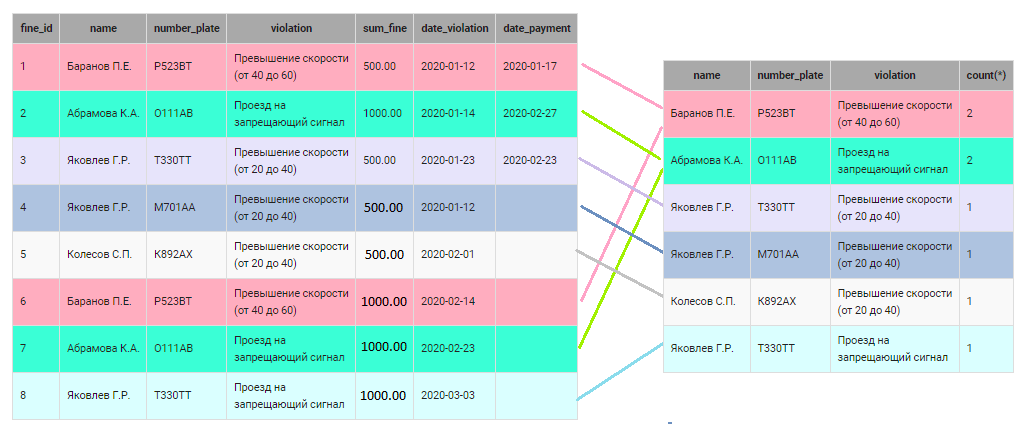

In [ ]:
# Вывести фамилию, номер машины и нарушение только для тех водителей, которые на одной машине нарушили одно
# и то же правило   два и более раз. При этом учитывать все нарушения, независимо от того оплачены они или нет. 
# Информацию отсортировать в алфавитном порядке, сначала по фамилии водителя, потом по номеру машины и, наконец, по нарушению


select name, number_plate, violation
from fine
group by name, number_plate, violation
having count(*)>1
order by name, number_plate, violation;


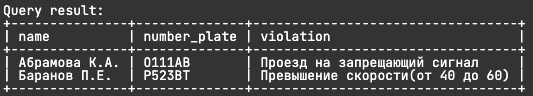

Использование ранее сделанных запросов для обновления конкретных позиций:

есть таблица нарушений водителей

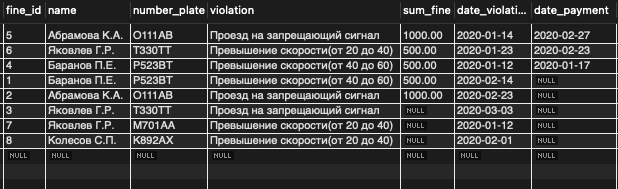

In [ ]:
# нужно : увеличить вдвое штрафы у тех, кто на одной и той же машине получал точно такие же нарушения, но не оплатил их

update fine, 
    (select name, number_plate, violation           # тут отбираем временную таблицу t: ее суть смотри в предыдущем запросе
     from fine
     group by name, number_plate, violation
    having count(*)>1
    order by name, number_plate, violation) as t

	set fine.sum_fine = fine.sum_fine*2             # увеличиваем штраф вдвое, если
	where fine.name = t.name                            # - имя из отобранной таблицы
    and fine.number_plate = t.number_plate              # - номер из отобранной таблицы
    and fine.violation = t.violation                    # - нарушение из отобранной таблицы
    and fine.date_payment is null;                      # - штраф до сих пор не оплачен

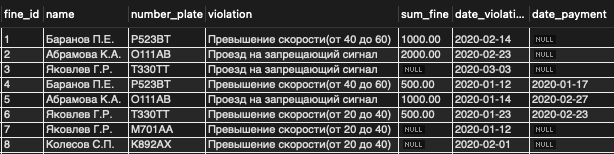

Группировка по нескольким атрибутам + сложные вложенные запросы

Посчитать количество баллов каждого абитуриента на каждую образовательную программу, на которую он подал заявление, по результатам ЕГЭ. В результат включить название образовательной программы, фамилию и имя абитуриента, а также столбец с суммой баллов, который назвать itog. Информацию вывести в отсортированном сначала по образовательной программе, а потом по убыванию суммы баллов виде.

In [ ]:
select name_program, name_enrollee, itog
from ( -- здесь вложенный запрос верхнего уровня: отобрать нужные столбцы из таблицы ниже
		select  t.program_id, t.enrollee_id, itog
		from

		(select     -- здесь влож запрос 2 уровня: группируем по двум атрибутам и суммируем баллы по ЕГЭ
		enrollee_id, program_id, sum(result) as itog
		from program_subject inner join enrollee_subject using(subject_id)
		group by program_id, enrollee_id) as t      -- информация соберется по совпадающим одновременно студентам
                                                    -- и программам, под которые подходят сданные студентом предметы

        -- а здесь пересекаем с таблицей сооответствия программы и студента 
        -- (чтобы считать баллы только для тех программ, которые студент выбрал)
		inner join program_enrollee on t.program_id = program_enrollee.program_id
										and t.enrollee_id = program_enrollee.enrollee_id) as t2
                                        
inner join program using(program_id)
inner join enrollee using(enrollee_id)
order by name_program, itog desc

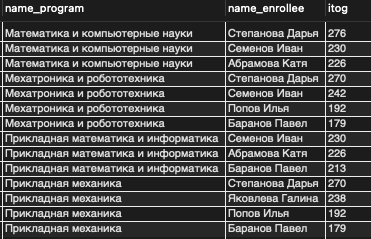

Совмещенные условия 

In [ ]:
# Посчитать стоимость всех экземпляров каждого автора без учета книг «Идиот» и «Белая гвардия». 
# В результат включить только тех авторов, у которых суммарная стоимость книг (без учета книг «Идиот» и «Белая гвардия») 
# более 5000 руб. Вычисляемый столбец назвать Стоимость. 
# Результат отсортировать по убыванию стоимости

select author, sum(price * amount) as Стоимость
from book
where title not in ("Идиот","Белая гвардия")
group by author
having Стоимость > 5000
order by Стоимость DESC;

Лимитирование (по типу head в pandas )

In [ ]:
USE project_simple;
SELECT * FROM project WHERE project_start <= project_finish; 

SELECT 
    client_name,
    AVG(DATEDIFF(project_finish, project_start)) as avg_days,   # именуем каждую колонку заново, потому что это результат
    MAX(DATEDIFF(project_finish, project_start)) as max_days,
    MIN(DATEDIFF(project_finish, project_start)) as min_days
FROM project WHERE project_start <= project_finish
group by client_name
order by max_days
LIMIT 5;   # прописываем аргументом число строк, которые хотим вывести с начала полученной таблицы 

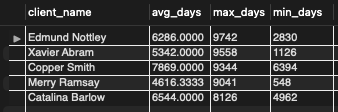

In [ ]:
# посчитать количество товаров для каждой категории

USE strore_simple;

SELECT category, count(1) FROM store    # выбираем столбец категории, выбираем агрегирующую функцию
group by category                       # группируем по выбранному столбцу
order by category;                      # сортируем по выбранному столбцу

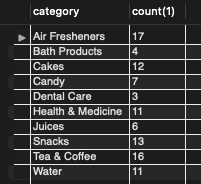

In [ ]:
# Выведите 5 категорий товаров, продажи которых принесли наибольшую выручку. 
# Под выручкой понимается сумма произведений стоимости товара на количество проданных единиц. 
# Результат должен содержать два столбца: название категории, выручка от продажи товаров в данной категории.


USE strore_simple;

SELECT 
	category,
	SUM(price * sold_num) as revenue
 FROM store
group by category
order by revenue DESC
LIMIT 5;

In [ ]:
# Выведите в качестве результата одного запроса общее количество заказов, 
# сумму стоимостей (бюджетов) всех проектов, средний срок исполнения заказа в днях.

use project_simple;
select 
	count(project_name) as number_of_projects,
    sum(budget) as budget_summary,
    avg(datediff(project_finish, project_start)) as avg_days
    
from project where project_finish>=project_start;

IF(логическое_выражение, выражение_1, выражение_2) условия
+ если True - выражение 1
+ False - выражение 2

In [ ]:
# выбрать и назначить скидку для книги

SELECT title, amount, price, 
    IF(amount<4, price*0.5, price*0.7) AS sale  -- 50% скидка если книг менее 4 шт
                                                -- 30% скидка во всех остальных случаях
FROM book;

In [ ]:
# составное условие: если автор Булгаков - поднять цену на 10%, если Есенин - на 5, в остальных - не поднимать

select author, title,
    ROUND(IF(author = "Булгаков М.А.", 
        price*1.1, 
        IF(author = "Есенин С.А.", price*1.05, price)), 
                                                    2)  # округл до 2 знаков после запятой
                                                    as new_price from book;

Сравнение с шаблоном LIKE:
+ % - любая строка от 0 и более символов
+ _ - любой одиночный символ

In [ ]:
# выбрать все строки, содержащие одиночный союз И (вначале, в середине или в конце предложения)

SELECT title FROM book 
WHERE   title LIKE "_% и _%" /*отбирает слово И внутри названия */
    OR title LIKE "и _%" /*отбирает слово И в начале названия */
    OR title LIKE "_% и" /*отбирает слово И в конце названия */
    OR title LIKE "и" /* отбирает название, состоящее из одного слова И */

### Общая структура модели базы данных

пошаговое создание БД https://stepik.org/lesson/308891/step/3?unit=291017


- структурная часть (понятия, объекты)

- Манипуляционная часть (операции и операторы)

- Ограничения целостности (описание структуры и правил доступа к данным)

#### Реляционная модель БД
https://stepik.org/lesson/32010/step/5?unit=12085

1) **СТРУКТУРНАЯ ЧАСТЬ**:

- Все объекты, хранящиеся в БД , должны быть строго типизированы (INT, DECIMAl etc)

- Домен - создание подмножества значений типа данных какого-то объекта (например, задали тип данных INT для числа проданных товаров, но INT может быть отрицательным, а проданные товары не могут быть отрицательным числом. Выход - дополнительное ограничение через логическое выражение на этот тип данных)

- Атрибуты - названия столбцов (хатактеристики объекта)

- Кортеж - по сути строка таблицы в виде (имя объекта, значение атрибута 1, значение атрибута2 ... , значение атрибута N)

- Схема отношений - именованное множество упорядоченных пар (по сути - это ИМЯ таблицы , а упорядоченные пары - имя атрибута и тип данных-домен). Например: Таблица billing (имя = схема отношений), payer_email VARCHAR (упорядоченная пара)

- Схема БД - это множество именнованных схем отношений (или множество таблиц)

- Отношение: тело отношения (множество кортежей) и значение отношения (тело отношения + схема отношения) 

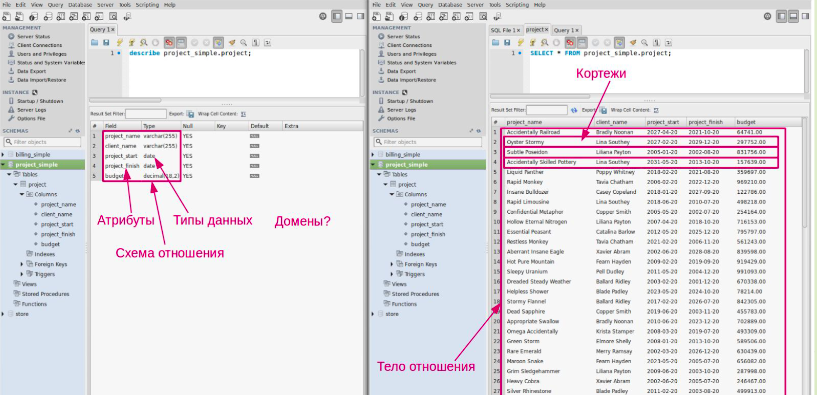

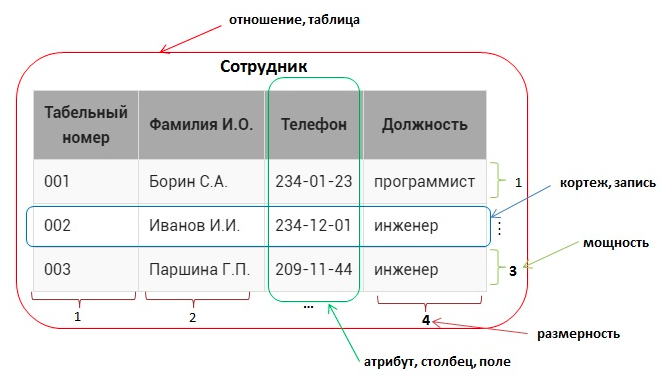

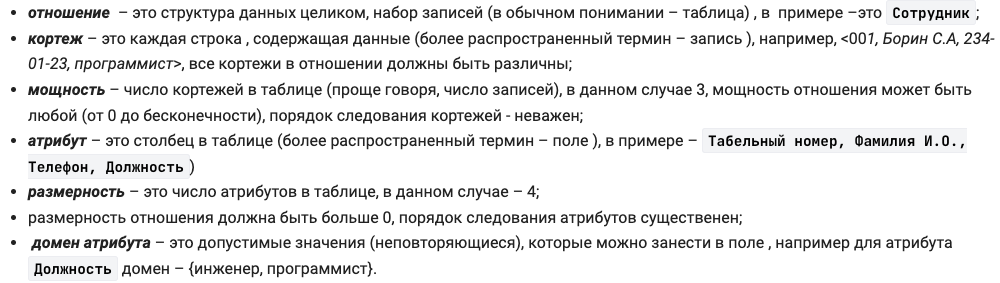

2. **МАНИПУЛЯЦИОННАЯ ЧАСТЬ**:

- основа языка - Data manipulation language (DML SQL) - позволяет оперировать данными

3. **ОГРАНИЧЕНИЕ ЦЕЛОСТНОСТИ**: некий набор правил, которому должна соответствовать БД

- Ограничение сущности
- ограничение ссылок

        3.1 Ограничение сущности: все кортежи (строки таблицы) должны быть отличимы друг от друга

Понятие ключа - минимальный набор атрибутов, который однозначно характеризует кортеж как уникальный набор

- не должно быть повторяющихся значений (условное требование)
- ключ должен однозначно идентифицировать кортеж - строку таблицы
- атрибуты в составе ключа не должны иметь неопределенных значений


        3.2 ограничение целостности ссылок

Понятие Внешнего ключа - атрибут (набор атрибутов), значение которого соответствуют значениям атрибутов первичного ключа какого-то Отношения. По сути, это связи между двумя таблицами, по которым они пересекаются

- суть целостности ссылок: для каждого внешнего ключа должен найтись кортеж с совпадающим атрибутом, либо значение должно быть NULL 

- способы поддержания ссылочной целостности: блокировка операции, присванивание значения NULL(или значения по умолчанию) или касакдное удаление

#### Выборки из нескольких источников

Декартово произведение 


In [ ]:
# вариант1: просто указать выбор из всех источников

USE store_medium;
SELECT * from category, product; 

# кстати, хороший способ пронумеровать строки в таблице :
USE store_medium;
SELECT *, ROW_NUMBER() OVER (order by price) AS row_num FROM category, product;

# вариант 2 CROSS JOIN
USE store_medium;
SELECT *, ROW_NUMBER() OVER (order by price) AS row_num FROM category cross join product;


In [ ]:
# организовать выставку КАЖДОЙ книги в КАЖДОМ городе 
# а также выбрать СЛУЧАЙНУЮ дату (заполнить даты случайным образом)

select name_city, name_author,
	DATE_ADD("2020-01-01", interval FLOOR(RAND() * 365) day) as Дата    # заполнить дату в столбце случайным образом
from author cross join city
order by name_city, Дата DESC;

# описание по работе с датой https://stepik.org/lesson/308886/step/4?unit=291012 

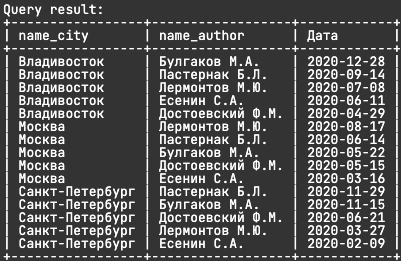

Соединение с условием

In [ ]:
# inner join  - аналогичен пандасовскому объединению по совпадающим значениям атрибутов

select * from category inner join product on category.category_id = product.category_id

# произойдет слияние двух таблиц, пересекающихся по значению category_id, все остальное он выкинет

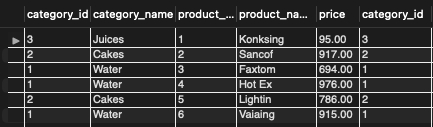

Пример: вывести все позиций списка товаров принадлежащие какой-либо категории с названиями товаров и названиями категорий. Список должен быть отсортирован по названию товара, названию категории. 

In [ ]:

select 
    g.name as good_name, c.name as category_name from    # первое объединение + сразу переименуем столбцы
	good as g inner join category_has_good as chg   
		on g.id = chg.good_id                            # объединяем по номеру товара
    inner join category as c                             # второе слияние
		on chg.category_id = c.id                        # объединяем по номеру категории
	order by good_name, category_name;                   # сортируем сначала по имени товара, потом по имени категории

Пример 2: вывести список клиентов (имя, фамилия) и количество заказов данных клиентов, имеющих статус "new".

- выбрать столбцы, которые хотим показывать, сразу дать им имя
- применить аггрегирующую функцию к столбцу заказов (считать все, которые в статусе NEW)
- объединить таблицы клиента с таблицами продаж (там мы знаем, что статус продажи = 1  означает, что заказ НОВЫЙ)
- группировать по имени и фамилии (потому что только имена могут совпадать)

In [ ]:
select 
	cl.first_name as first_name, cl.last_name as last_name, COUNT(sale.status_id) as new_sale_num
    from client as cl inner join sale
		on cl.id = sale.client_id
	where sale.status_id = 1
    group by cl.first_name, cl.last_name;

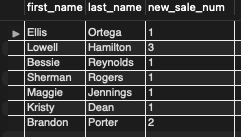

Левое или правое соединение (диаграмма эйлера: пересечение множеств + все остальное из левого или правого множества)

In [ ]:
# если в таблице, стоящей слева есть некое имя строки, которому ничего не соответствует в правой таблице, 
# то при левом объединении для этого имени объединенные атрибуты будут содержать значения NULL 

use store_medium;
select * from category as c left outer join product as p 
	on p.category_id = c.category_id;

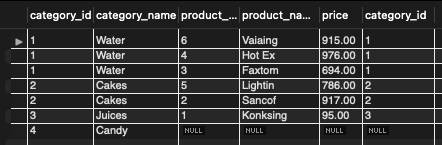

Объединение двух выборок UNOIN : размещает результаты выборок друг под другом

In [ ]:
select * from product where price >900
union #all - опционально, если хотим сохранить дубликаты объединения
select * from product where price <100;


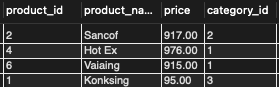

Полное объединение

- реализуется при помощи слияния двух поочередных объединений: сначала левого, потом правого

In [ ]:
# пример: вывести список товаров с названиями категорий, в том числе товаров, 
# не принадлежащих ни к одной из категорий, в том числе категорий не содержащих ни одного товара

select                                                              # блок 1: взять все из таблицы левой таблицы
    g.name as good_name, c.name as category_name from               # даже если нет пересечения с правой
	good as g left outer join category_has_good as chg   
		on g.id = chg.good_id                            
    left outer join category as c                             
		on chg.category_id = c.id
        
union                                                               # объединяем с блоком 2

select                                                              # блок 2: взять все из таблицы правой таблицы,
    g.name as good_name, c.name as category_name from               #  даже если нет пересечения с левой
	good as g right outer join category_has_good as chg   
		on g.id = chg.good_id                            
    right outer join category as c                             
		on chg.category_id = c.id
       
order by good_name, category_name; 

Пример: вывести список всех источников клиентов и суммарный объем заказов по каждому источнику. Результат должен включать также записи для источников, по которым не было заказов

In [ ]:
select
	source.name as sourse_name,                 # отбираем столбец имя источника
    sum(sale.sale_sum) as sale_sum              # столбец сумма, полученная с источника + агг функция суммирования 
    from 
		source left outer join client as c      # объединяем таблицу источников по левой границе с таблицей клиентов
			on source.id = c.source_id              # по номеру ресурсов
        left outer join sale                    # результат объединяем по левой границе с таблицей заказов
			on c.id = sale.client_id                # по сумме заказов
            
	group by source.id;                         # группируем все это по номеру источника (сработает аггрегирующая функция)

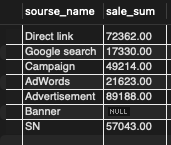

Пример 2: вывести названия товаров, которые относятся к категории 'Cakes' или фигурируют в заказах текущий статус которых 'delivering'. Результат не должен содержать одинаковых записей. В запросе необходимо использовать оператор UNION для объединения выборок по разным условиям.

In [ ]:
select g.name as good_name                                      # блок 1: взять только продукты из категории Cakes
	from good as g inner join category_has_good as chg
		on g.id = chg.good_id
	inner join category on chg.category_id = category.id
    where category.name = 'Cakes'
    
union 

select g.name as good_name                                      # блок 2: взять продукты, которые в статусе доставки
	from good as g inner join sale_has_good as shg
		on g.id = shg.good_id
	inner join sale on sale.id = shg.sale_id
    where sale.status_id =5;                                # из таблицы status мы знаем, что 5 - номер статуса delivering




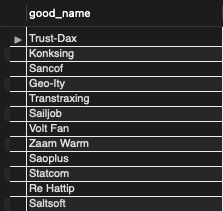

Пример 3: вывести список всех категорий продуктов и количество продаж товаров, относящихся к данной категории. Под количеством продаж товаров подразумевается суммарное количество единиц товара данной категории, фигурирующих в заказах с любым статусом.

- взять нужно ВСЕ категории продуктов, даже если по ним ничего не продано, поэтому применять левое присоединение
- дальше по цепочке перейти по каждой таблице
- как доберемся до таблицы продаж, взять в качестве аргумента номера заказов (любой статус) и применить агг функцию подсчета
- сгруппировать все по названиям категорий + отсортировать

In [ ]:
select c.name as name,
		count(sale.id) as sale_num
        from category as c left outer join category_has_good as chg
			on c.id = chg.category_id
		left outer join good on chg.good_id = good.id
		left outer join sale_has_good as shg
			on good.id = shg.good_id
		left outer join sale on shg.sale_id = sale.id
        
        group by c.name
        order by c.name;

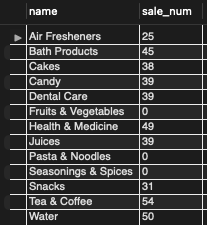

Пример 4: вывести список источников, из которых не было клиентов, либо клиенты пришедшие из которых не совершали заказов или отказывались от заказов. Под клиентами, которые отказывались от заказов, необходимо понимать клиентов, у которых есть заказы, которые на момент выполнения запроса находятся в состоянии 'rejected'. В запросе необходимо использовать оператор UNION для объединения выборок по разным условиям.

In [ ]:
select s.name as source_name,
		sale.sale_sum,
        sale.status_id as status
	from 
	source as s left outer join client as c
		on s.id = c.source_id
	left outer join sale
		on c.id = sale.client_id
	where sale.sale_sum = 0 or sale.sale_sum is null
    
union 

select s.name as source_name,
		sale.sale_sum,
        sale.status_id as status

	from 
	source as s left outer join client as c
		on s.id = c.source_id
	left outer join sale
		on c.id = sale.client_id
	where sale.sale_sum = 0 or sale.sale_sum is null or sale.status_id = 7;
    
    

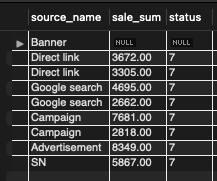

### Проектирование БД 
https://stepik.org/lesson/32014/step/7?unit=12089

Проектирование с помощью семнтических моделей

- формирование концептуальной схемы данных (напр, на основе некой реляционной модели БД)

- преобразование схемы данных к логической схеме данных на основе некоторой модели (напр, реляционной модели БД)

- преобразование к некому физическому представлению

Проще говоря:

- создать идею, некий концепт - обычно как у всех реляционных моделей

- затем создать отношения - блок таблиц со своими кортежами и схемой отношений (данные + тип данных)

- представить это в понятном для пользователе виде - то есть в качестве итоговых таблиц, с которыми можно проводить действия

Популярная семантическая модель: **модель СУЩНОСТЬ - СВЯЗЬ (ER)**

- сущность 
- связь
- атрибут, тип данных, домен
- ключи
- ограничение целостности

In [1]:
# создание таблиц

CREATE TABLE IF NOT EXISTS `best_offer_sale`(
  `id` INT NOT NULL,
  `name` VARCHAR(255) NULL,
  `dt_start` DATETIME NOT NULL,
  `dt_finish` DATETIME NOT NULL,  
  PRIMARY KEY (`id`))
ENGINE = InnoDB
DEFAULT CHARACTER SET = utf8;

Создание таблиц на основе других таблиц

In [ ]:
# Создать таблицу заказ (ordering), куда включить авторов и названия тех книг, 
# количество экземпляров которых в таблице book меньше 4. 
# Для всех книг указать одинаковое количество экземпляров 5.

CREATE TABLE ordering AS
SELECT author, title, 5 AS amount   # проставить одинаковые значения в столбце
FROM book
WHERE amount < 4;

SELECT * FROM ordering;

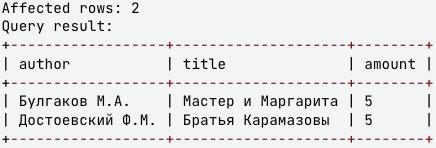

In [ ]:
# Создать таблицу заказ (ordering), куда включить авторов и названия тех книг, количество экземпляров которых 
# в таблице book меньше среднего количества экземпляров книг в таблице book. 
# В таблицу включить столбец   amount, в котором для всех книг указать одинаковое значение - среднее количество экземпляров книг в таблице book

CREATE TABLE ordering AS
SELECT author, title,
    (select round(avg(amount)) from book
    ) as amount
FROM book
where amount< (select avg(amount) from book) ;

Добавление и удаление элементов

In [ ]:
# добавление и удаление элементов

ALTER TABLE `client`
    DROP COLUMN code,
    DROP FOREIGN KEY fk_client_source1,     # удаление внешнего ключа для возможности удаления атрибута "source_id"
    DROP COLUMN source_id,
    ADD COLUMN sale_status VARCHAR(255) NOT NULL DEFAULT 'new'  # добавление нового атрибута

In [ ]:
# удаление таблиц
DROP TABLE `source`

In [ ]:
# добавление атрибута таблицы с ограничением внешнего ключа 

ALTER TABLE `client`
    ADD COLUMN source_id INT,
    ADD CONSTRAINT fk_source_id FOREIGN KEY (source_id) REFERENCES source(id)
    # определения внешнего ключа для существующего или добавляемого поля source_id, указывающего на поле id таблицы 'source'



### нормальная форма базы данных

https://stepik.org/lesson/32020/step/6?unit=12095

1НФ, 2НФ, 3НФ, НФБК

Суть преобразований: 
+ сделать так, чтобы все неключевые атрибуты полностью зависели от ключевых атрибутов: простых или составных.
+ одному значению атрибута сооветствует СТРОГО ОДНО значение другого атрибута

В противном случае, они должны быть отнесены к другим отношениям

###

### Вложенные запросы
https://stepik.org/lesson/297514/step/1?unit=279274

Вложенный запрос имеет следующие компоненты:

+ ключевое слово SELECT  после которого указываются имена столбцов или выражения (чаще всего список содержит один элемент) ;
+ ключевое слово FROM и имя таблицы, из которой выбираются данные;
+ необязательное предложение WHERE;
+ необязательное предложение GROUP BY:
+ необязательное предложение HAVING

Пример: найти строку в таблице, где стоимость книги равна минимальной стоимости из всех книг 

In [ ]:
SELECT title, author, price, amount
FROM book
WHERE price = (
         SELECT MIN(price) 
         FROM book
      );

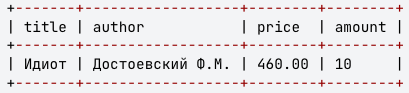

In [ ]:
# вывести информацию (автора, название и цену) о тех книгах, цены которых превышают минимальную цену книги 
# на складе не более чем на 150 рублей в отсортированном по возрастанию цены виде.

select author, title, price
from book
where (price - (select min(price) from book)) <=150
order by price;

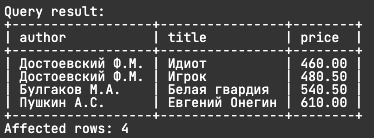

Вложеный запрос по значению столбца 

In [ ]:
# Вывести информацию о книгах тех авторов, общее количество экземпляров книг которых не менее 12.

SELECT title, author, amount, price
FROM book
WHERE author IN (
        SELECT author 
        FROM book 
        GROUP BY author 
        HAVING SUM(amount) >= 12
      );

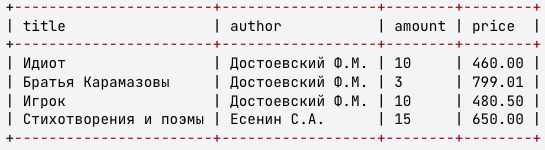

In [ ]:
# выбрать только те записи, у которых количество экземпляров уникальное

select author, title, amount
from book
where amount in (select amount
				from book
				group by amount
				having count(title) =1)
;

Выборка с операторами ALL , ANY

In [ ]:
# вывести информацию о книгах(автор, название, цена), цена которых меньше самой большой из минимальных цен, 
# вычисленных для каждого автора.

select author, title, price
from book
where price < any (select min(price)    # any вернет наибольшее значение
                  from book
                  group by author)
;

In [ ]:
# вывести информацию о тех книгах, количество которых меньше самого маленького среднего количества книг каждого автора.

SELECT title, author, amount, price
FROM book
WHERE amount < ALL (                    # all вернет наименьшее значение 
        SELECT AVG(amount) 
        FROM book 
        GROUP BY author 
      );

Фильтрация по вложенному условию

In [ ]:
# вывести информацию о книгах, количество экземпляров которых отличается от среднего количества 
# экземпляров книг на складе более чем на 3,  а также указать среднее значение количества экземпляров книг.

SELECT title, author, amount, 
    (
     SELECT AVG(amount) 
     FROM book
    ) AS Среднее_количество 
FROM book
WHERE abs(amount - (SELECT AVG(amount) FROM book)) >3;

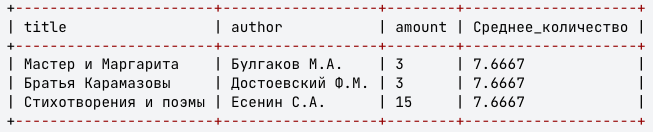

In [ ]:
# выбрать книги, которые нужно дозаказать, чтобы количество всех книг стало одинаковым

select title, author, amount,
    -(amount - (select max(amount) from book)) as Заказ
    from book
    where (amount - (select max(amount) from book)) <>0;

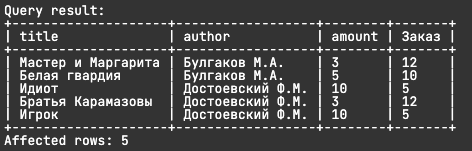

In [ ]:
# Вывести фамилию с инициалами и общую сумму суточных, полученных за все командировки для тех сотрудников, 
# которые были в командировках больше чем 3 раза, в отсортированном по убыванию сумм суточных виде. 
# Последний столбец назвать Сумма

select name,
    sum(per_diem * (datediff(date_last,date_first)+1)) as Сумма
    from trip
where name in (select name from trip
				group by name
				having count(1)>3)      # тут фильтруем вложенный запрос имен по количеству повторений имени в таблице 

group by name
order by Сумма desc;

Фильтрация по названию или номеру месяца

In [ ]:
# Вывести название месяца и количество командировок для каждого месяца. 
# Считаем, что командировка относится к некоторому месяцу, если она началась в этом месяце. 
# Информацию вывести сначала в отсортированном по убыванию количества, а потом в алфавитном порядке по названию месяца виде. 
# Название столбцов – Месяц и Количество.

select MONTHNAME(date_first) as Месяц,
    count(1) as Количество
from trip
group by MONTHNAME(date_first)
order by Количество desc, Месяц asc;

# номер месяца - функция MONTH()
# разница в датах - функция DATEDIFF(date1,date2)

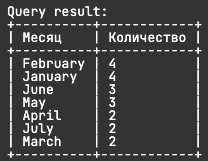

In [ ]:
# в таблицу fine занести дату оплаты соответствующего штрафа из таблицы payment; 
# уменьшить начисленный штраф в таблице fine в два раза  (только для тех штрафов, информация о которых занесена в 
# таблицу payment) , если оплата произведена не позднее 20 дней со дня нарушения.

SET SQL_SAFE_UPDATES = 0;

UPDATE 
    fine as f, payment as p
SET 
    f.date_payment = p.date_payment,
    f.sum_fine = if(f.date_payment is not null 
					and datediff(f.date_payment, f.date_violation) <=20, 
                    f.sum_fine*0.5, f.sum_fine)
where 
			f.violation = p.violation 
			and f.number_plate = p.number_plate
			and f.date_violation = p.date_violation
			and f.date_payment is null
            
;


select * from fine;

Создание связанной таблицы с указанием внешнего ключа, относимого к главной таблицы

In [ ]:
CREATE TABLE book (
    book_id INT PRIMARY KEY AUTO_INCREMENT, 
    title VARCHAR(50), 
    author_id INT NOT NULL, 
    price DECIMAL(8,2), 
    amount INT, 
    FOREIGN KEY (author_id)  REFERENCES author (author_id)  # внешний ключ author_id таблицы book, который
                                                            # связан с таблицей author по первичному ключу author_id
);

Действие при удалении записи из главной таблицы ON DELETE

+ CASCADE: автоматически удаляет строки из зависимой таблицы при удалении  связанных строк в главной таблице.

+ SET NULL: при удалении  связанной строки из главной таблицы устанавливает для столбца внешнего ключа значение NULL. (В этом случае столбец внешнего ключа должен поддерживать установку NULL).

+ SET DEFAULT похоже на SET NULL за тем исключением, что значение  внешнего ключа устанавливается не в NULL, а в значение по умолчанию для данного столбца.

+ RESTRICT: отклоняет удаление строк в главной таблице при наличии связанных строк в зависимой таблице.



CREATE TABLE book (
    book_id INT PRIMARY KEY AUTO_INCREMENT, 
    title VARCHAR(50), 
    author_id INT NOT NULL, 
    genre_id INT,
    price DECIMAL(8,2), 
    amount INT, 
    FOREIGN KEY (author_id)  REFERENCES author (author_id) ON DELETE CASCADE,   # для ключа author каскадное удаление
    FOREIGN KEY (genre_id)  REFERENCES genre (genre_id) ON DELETE SET NULL      # для ключа genre - установить NULL
);

Обновление строк таблицы более, чем на ОДНОМ WHERE не работает

https://stackoverflow.com/questions/1421116/sql-where-clause-on-each-set-command-in-update

Нужно использовать для каждого изменения свой запрос:

1) Update ... set .. where ...
2) Update ... set .. where ...
...
3) Update ... set .. where ...


Или использовать конструкцию when+ case + else + end (см ссылку)

Пример: требуется заполнить данные столбца одной таблицы данными из другой таблицы по совпадению в третьем столбце

In [ ]:
# вариант 1 - пересечение по столбцу с последующим обновлением

set sql_safe_updates =0;

update book as b, author as a,
	(select a.author_id, b.author                       # тут создаем временную таблицу, которая является результатом
	from book as b left outer join author as a          # пересечения таблиц book and author
	on b.author = a.name_author) as temp                # по столбцу имя автора
	
    set 
		b.author_id = temp.author_id where b.author = temp.author;      # тут устанавливаем значение в столбце автор_ид
                                                                        # в тех местах, где совпадение имени автора
update book as b, genre as g
	set 
        b.genre_id = if(b.author like "Есенин %", 2,1);
        
select * from book;


# другой способ намного проще: просто по равенству значений в каждом столбце
update book as b, author as a
    set 
		b.author_id = a.author_id where b.author = a.name_author;   # результат тот же

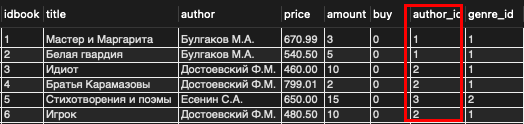

Сложный запрос: Вывести авторов, общее количество книг которых на складе максимально

включает в себя вложенные запросы обращения к двум таблицам несколько раз:
+ выбираем нужные столбцы, в том числе вычисляемый

+ сливаем таблицу автор и таблицу книги так, чтобы значения сопоставились

+ выбираем только те позиции, которые удовлетворяют вложенном условию: 

        1) сумма по количеству должна быть равна максимальному значению
        2) для поиска максимального значения создается дополнительный вложенный запрос:

            + сгруппированная таблица КНИГИ по номерам авторов покажет сумму книг у КАЖДОГО автора
            + из нее мы возьмем максимальное значение 

Обновить данные таблицы 1 данными из другой таблицы2, если  таблица2 создана "на лету"

https://stepik.org/lesson/310420/step/4?unit=292726

Условие: Повысить итоговые баллы абитуриентов в таблице applicant на значения дополнительных баллов

In [ ]:
update applicant as app, 
    (select enrollee_id, if(sum(bonus) is null, 0, sum(bonus)) as Бонус
    from enrollee left outer join enrollee_achievement using(enrollee_id)
        left outer join achievement using(achievement_id)
        group by enrollee_id

    order by name_enrollee
    ) as temp

set app.itog = app.itog + temp.Бонус

where app.enrollee_id = temp.enrollee_id

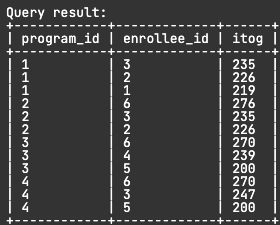

In [ ]:
SELECT name_author, SUM(amount) as Количество
    
    FROM 
    author INNER JOIN book
    on author.author_id = book.author_id
GROUP BY name_author
HAVING SUM(amount) = 
     
     (/* вычисляем максимальное из общего количества книг каждого автора */
      SELECT MAX(sum_amount) AS max_sum_amount
      FROM 
          (/* считаем количество книг каждого автора */
            SELECT author_id, SUM(amount) AS sum_amount 
            FROM book GROUP BY author_id
          ) query_in            # указать временное имя вложенного запроса ОБЯЗАТЕЛЬНО!
      );

Пример 2 сложный запрос: найти всех писателей, которые пишут только в одном жанре

In [ ]:
# вариант 1

SELECT DISTINCT  name_author
FROM author INNER JOIN book 
	on author.author_id = book.author_id
WHERE book.author_id IN                         # выбрать авторов, которые во вложенном запросе
	(SELECT author_id 
    FROM book 
    GROUP BY author_id                          # сгруппированные по писателю в одном запросе
    HAVING MIN(genre_id) = MAX(genre_id));      # имеют одинаковые минимальное и максимально значение жанра
                                                # возможно только в случае, когда все значения, попавшие к писателю,
                                                # одинаковые


# решение 2
select name_author

from author as a left outer join book as b
	on b.author_id = a.author_id

group by name_author
having count(distinct(genre_id))=1          # считать уникальные значения жанров, сгруппированных по автору
                                            # если одно уникальное значение - значит наш клиент
;

##### Пересечение / слияние/ объединение таблиц, полученных от вложенных запросов

Пример: найти авторов, пишущих книги в самом популярном жанре. Указать этот жанр.

Самым популярным считать жанр, общее количество экземпляров книг которого на складе максимально. Таких жанров может быть несколько, если они имеют одинаковое максимальное значение общего количества экземпляров

Стратегия:

+ создать две вспомогательные таблицы (на каждую вложенный запрос)

        - в первой считаем количество всех книг, сгруппированных по жанру
        - во второй находим максимально число книг, относимых к какому-то одному жанру

+ пересекаем эти две таблицы через INNER, что позволяет оставить в таблице ВСЕ жанры, подходящие под условие максимальности книг (жанров может быть больше 1)

+ выбрать из итоговой таблицы после пересечения только сами отобранные жанры

+ номера искомых жанров получены

+ теперь остается только взять из таблицы книг имена авторов, которым соответствует жанр из выборки выше

1) в группировку включен столбец genre_id, который используется в HAVING. Это связано с тем, что в HAVING можно использовать либо столбцы, перечисленные в GROUP BY, либо вычисляемые с помощью групповых функций столбцы. Добавление столбца genre_id не влияет на группировку, так как между названием жанра и его id - взаимно-однозначное соответствие.

2) Название столбца genre_id задается с указанием имени таблицы (genre.genre_id), так как этот столбец входит в структуру двух таблиц book и genre.  Для этого запроса можно было бы указать и book.genre_id, так как эти таблицы связаны внутренним соединением INNER JOIN и имеют одинаковые значения в полях genre.genre_id и book.genre_id.

In [ ]:
# решение 

SELECT  name_author, name_genre
FROM 
    author 
    INNER JOIN book ON author.author_id = book.author_id
    INNER JOIN genre ON  book.genre_id = genre.genre_id

GROUP BY name_author,name_genre, genre.genre_id             # искусственно добавили последний столбец для того, 
                                                            # чтобы иметь возможность использовать его в HAVING 
HAVING genre.genre_id IN
         
         (/* выбираем автора, если он пишет книги в самых популярных жанрах*/
          SELECT query_in_1.genre_id
          FROM 
              ( /* выбираем код жанра и количество произведений, относящихся к нему */
                SELECT genre_id, SUM(amount) AS sum_amount
                FROM book
                GROUP BY genre_id
               )query_in_1
          
          INNER JOIN 

              ( /* выбираем запись, в которой указан код жанр с максимальным количеством книг */
                SELECT genre_id, SUM(amount) AS sum_amount
                FROM book
                GROUP BY genre_id
                ORDER BY sum_amount DESC
                LIMIT 1
               ) query_in_2
          ON query_in_1.sum_amount= query_in_2.sum_amount
         ); 




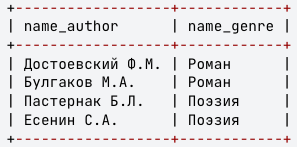

Аналогичный пример: найти всю информацию о книгах, написанных в самых популярных жанрах

разница в том, что нужно отобрать все жанры для таблицы КНИГИ , но так, чтобы запрос был однозначным (не был неопределенным, не был ambigious)

+ достигается тем, что в запросе при JOIN исключаются дублирующие столбцы, по которым идет объединение
через USING(имя_столбца, дубликаты которого нужно исключить)

In [ ]:
SELECT  title, name_author, name_genre, price, amount 
FROM 
    author 
    INNER JOIN book ON author.author_id = book.author_id
    INNER JOIN genre using(genre_id)


where genre_id IN
         
         (/* выбираем автора, если он пишет книги в самых популярных жанрах*/
          SELECT query_in_1.genre_id
          FROM 
              ( /* выбираем код жанра и количество произведений, относящихся к нему */
                SELECT genre_id, SUM(amount) AS sum_amount
                FROM book
                GROUP BY genre_id
               )query_in_1
          
          INNER JOIN 

              ( /* выбираем запись, в которой указан код жанр с максимальным количеством книг */
                SELECT genre_id, SUM(amount) AS sum_amount
                FROM book
                GROUP BY genre_id
                ORDER BY sum_amount DESC
                LIMIT 1
               ) query_in_2
          ON query_in_1.sum_amount= query_in_2.sum_amount
         )
         
order by title; 




            USING позволяет указать набор столбцов, которые есть в обеих объединяемых таблицах. Если база данных хорошо спроектирована, а каждый внешний ключ имеет такое же имя, как и соответствующий первичный ключ (например, genre.genre_id = book.genre_id), тогда можно использовать предложение USING для реализации операции JOIN

#### Обновление через связанные таблицы.

Еще раз об INNER JOIN: 
+ допустим, есть три таблицы: book, author, supply

+ нам нужно найти все строки, которые совпадают: по названию книги и по автору

+ но чтобы пересечь таблицы book and supply по имени автора, нужно подтягивать таблицу author

In [ ]:
select * 
from book inner join author using(author_id)
	inner join supply on book.title = supply.title
						and author.name_author = supply.author

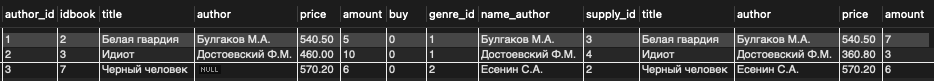

+ все таблицы связались по индексу автора, затем (по имени книги + имени автора) 
+ и остались только те строки, у которых ПОЛНОЕ совпадение указанных характеристик

**ЧТО ЭТО ДАЕТ?**

теперь мы можем вносить изменения в выбранные строки, использяю синтаксис UPDATE - SET

Например: 
1) Для книг, которые уже есть на складе (в таблице book), но по другой цене, чем в поставке (supply),  необходимо в таблице book увеличить количество на значение, указанное в поставке,  и пересчитать цену. 
2)  в таблице  supply обнулить количество этих книг

In [ ]:
Update book inner join author using(author_id)
	inner join supply on book.title = supply.title
						and author.name_author = supply.author

set book.price = (book.price * book.amount + supply.price * supply.amount)/ (book.amount +supply.amount),   # пересчет цены
	book.amount = book.amount + supply.amount,          # пересчет количества 
	supply.amount = 0                                   # обнуление в таблице поставки
    
    where book.price <> supply.price;                   # условие отбора - если цены в таблицах разные 

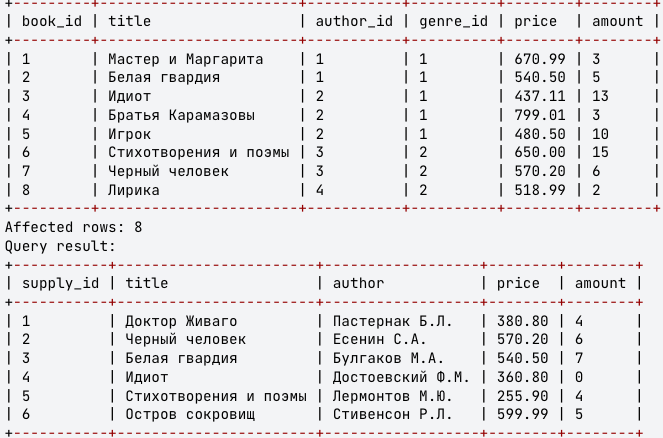

#### Добавление записей через вложенные запросы

Суть поиска: нужны позиции, которые есть в таблице supply, но нет в таблице book

Цель: добавить отсутствующие позиции в таблицу book

In [ ]:
SELECT name_author, supply.author
FROM 
    author 
    RIGHT JOIN supply ON author.name_author = supply.author;

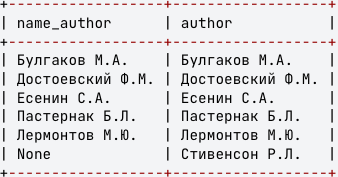

Останется только отфильтровать по столбцу name_author = NULL 

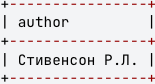

In [ ]:
insert into author (name_author)

        SELECT supply.author
        FROM 
        author
        RIGHT JOIN supply on author.name_author = supply.author
        WHERE name_author IS Null
;

select * from author;

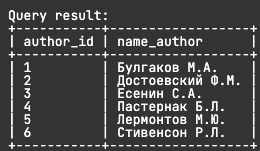

Внести данные из таблицы supply в таблицу book, которых нет в таблице book 

In [ ]:
insert into book (title, author_id, price, amount)
SELECT title, author_id, price, amount  
FROM 
    author 
    INNER JOIN supply ON author.name_author = supply.author
WHERE amount <> 0;

# этот запрос добавит строки 7 и 8 в таблицу book 

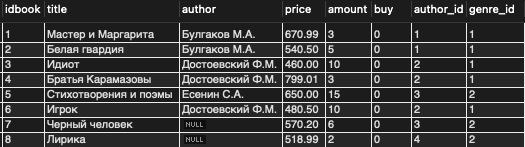

Добавление по сложному запросу из нескольких таблиц

+ Случайным образом выбрать три вопроса (запрос) по дисциплине, тестирование по которой собирается проходить студент, занесенный в таблицу attempt последним, и добавить их в таблицу testing.

+ id последней попытки получить как максимальное значение id из таблицы attempt

In [ ]:
insert into testing(attempt_id, question_id) -- в таблицу вносим значения указанных атрибутов
select attempt_id, question_id               -- выбираем значения из другой таблицы

from (   -- здесь главная таблица, которую мы создаем с нуля
		select question_id,                                         -- тут столбец вопроса
            (select max(attempt_id) from attempt) as attempt_id     -- здесь ЗАДАВАЕМОЕ значение столбца attempt_id
                                                                    -- как максимальное значение попытки из attempt таблицы
                                                                    -- что гарантирует, что эта запись последняя в ней
                                                                    -- (по сути мы создали в Главной таблице столбец и заполнили 
                                                                    -- их единственным значением)
		from 

        -- второстепенна таблица отбора вопросов случайным образом
		(select question_id from question                           -- отбираем вопросы, у которых  
		where subject_id = (                                        -- предмет соответствует последней записи
			select subject_id from attempt                          -- в таблице attempt
			where attempt_id = (                                    -- а последяя запись - это МАКСИМАЛЬНЫЙ номер
				select max(attempt_id)                              -- попытки attempt_id
				from attempt))
		order by rand()                                             -- а это способ отбора 3 вопросов случайным образом
		limit 3) as temp) as temp_2

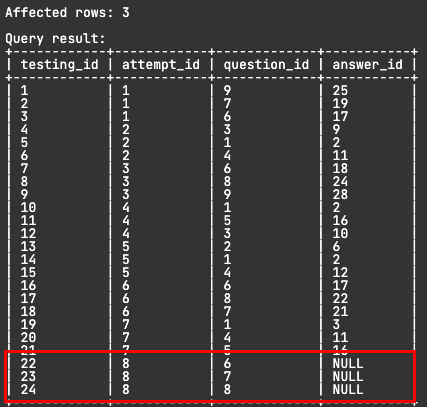

Удаление данных из таблицы:, используя данные (условие) из другой таблицы

In [ ]:
# пример 
# Удалить всех авторов из таблицы author, у которых есть книги, количество экземпляров которых меньше 3. 
# Из таблицы book удалить все книги этих авторов.

DELETE FROM author
USING 
    author 
    INNER JOIN book ON author.author_id = book.author_id
WHERE book.amount < 3;

SELECT * FROM author;

SELECT * FROM book;

+ Из таблицы АВТОР уйдут все писатели, которые имеют меньше 3 экземпляров любой книги в таблице КНИГИ

+ Из таблицы КНИГИ уйдут все эти строки с этими авторами засчет каскадного удаления

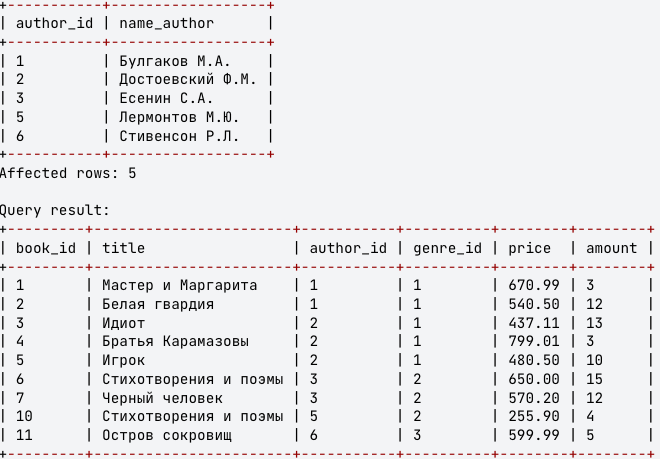

In [ ]:
# пример
# Удалить всех авторов, которые пишут в жанре "Поэзия". 
# Из таблицы book удалить все книги этих авторов. 

delete from author
using 
    author inner join book using(author_id)
    inner join genre using(genre_id)
    where name_genre = 'Поэзия';

**Обновление таблицы с использованием вложенного запроса, обращенного К ТОЙ ЖЕ таблице**

вызовет ошибку ERROR 1093: You can't specify target table 'book' for update in FROM clause

Она возникает в MySQL, когда в основном запросе UPDATE прямо указывается целевая таблица для обновления (в данном случае 'book'), а затем в этом же запросе в подзапросе FROM используется та же самая таблица.

MySQL не позволяет прямо ссылаться на целевую таблицу в подзапросе FROM, так как это может вызвать проблемы с целостностью данных и конфликтами блокировки.

Для обхода этой ошибки в MySQL можно использовать вложенный подзапрос, чтобы сначала выбрать нужные значения, а затем использовать их в основном запросе UPDATE

In [ ]:
# пример : Увеличить стоимость книг на 10%, которых нет в ближайшей поставке.

update book 

set book.price = book.price * 1.1

where idbook in (
	select idbook from(                     # вот тут создаем вспомогательный запрос, чтобы избежать ошибки
    SELECT book.idbook
	FROM 
    author inner join book using(author_id)
    left JOIN supply 
		ON author.name_author = supply.author       # а отобрать нужно те книги, у которых совпадает и название и автор
        and book.title = supply.title
        
	where supply.title is null) as query1)          # здесь останутся только те книги, которые есть в book, но нет в supply
;

select * from book;




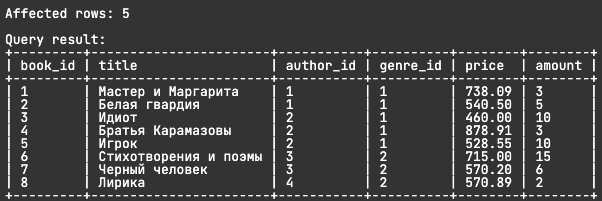

Пример на пересечение таблиц, образованных от вложенного запроса:

Условие:Вывести номера заказов (buy_id) и названия этапов,  на которых они в данный момент находятся. Если заказ доставлен –  информацию о нем не выводить. Информацию отсортировать по возрастанию buy_id.

Решение: 


1) сначала фильтруем таблицу buy_step так, чтобы в столбце последней даты остались только NULL (это значит незавершенные операции)

2) потом группируем отфильтрованную таблицу по номеру заказа, выбирая МИНИМАЛЬНОЕ значение step_id: это будет означать, что для незавершенных операций по заказу мы выбираем текущую, а не итоговую, потому что у предыдущей операции по заказу стоит дата завершения операции (спасибо фильтрации из шага 1)

3) теперь используем текущую таблицу как вложенный запрос и пересекаем ее с таблицей step, чтобы узнать имена этих операций, выводим

In [ ]:
select temp.buy_id, s.name_step
	from (select buy_id, min(step_id) as min_step_id from buy_step
		where date_step_end is null
		group by buy_id) as temp
	inner join step as s on s.step_id = temp.min_step_id

order by temp.buy_id, s.step_id

;

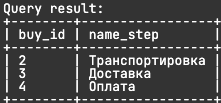


Пример на выборку отдельных столбцов из таблицы , созданной по вложенному запросу

Условие: В таблице city для каждого города указано количество дней, за которые заказ может быть доставлен в этот город (рассматривается только этап "Транспортировка"). Для тех заказов, которые прошли этап транспортировки, вывести количество дней за которое заказ реально доставлен в город. А также, если заказ доставлен с опозданием, указать количество дней задержки, в противном случае вывести 0. В результат включить номер заказа (buy_id), а также вычисляемые столбцы Количество_дней и Опоздание. Информацию вывести в отсортированном по номеру заказа виде.

Интересное: создавать столбец и его заполнение можно по условию IF 

In [ ]:
select buy_id, Количество_дней , Опоздание
    from (
        select buy_id,  name_step, date_step_beg, date_step_end, name_city, days_delivery,
                datediff(date_step_end, date_step_beg) as Количество_дней,
                IF(datediff(date_step_end, date_step_beg) < days_delivery, 0,       # создать столбец по условию IF
                    datediff(date_step_end, date_step_beg) - days_delivery)
                    as Опоздание 
            from 
                buy_step inner join step using(step_id)
                inner join buy using(buy_id)
                inner join client using(client_id)
                inner join city using(city_id)
            where name_step in ('Транспортировка') and date_step_end is not null
            order by buy_id
        ) as res_table;

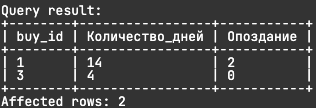

Еще пример на вложенные запросы по поиску вычисляемого значения, равного максимальному

Условие:

Решение: 
кажется, разобрался с субзапросами. Главное, не растерять это знание.

1) создаем субзапрос1:
- объединяем таблицы book и buy_book
- группируем ее по genre_id
- считаем сумму количества купленных книг sum(amount) as sum amount

2) создаем субзапрос2: выбираем максимальное значение max(sum_amount) из сз1

3) создаем сз3: 
- он аналогичен сз1 за исключением того, что из него мы берем не только sum_amount, но и genre_id
- фильтруем через having по условию sum_amount = результату субзапроса2

4) создаем субзапрос4(головной), которым забираем имя жанра и количество sum_amount из объединенных таблиц сз3 + genre

Шаги 2 и 3 нужны для того, чтобы не потерять жанры, у которых количество проданных экземпляров тоже равно максимальному (таких жанров могло быть более одного). Где-то в лекциях этот случай подробно разбирали.

In [ ]:
select name_genre, sum_amount as Количество
from 
	(select genre_id, sum(bb.amount) as sum_amount
		from buy_book as bb
		right outer join book using(book_id)
		
	group by genre_id

	having sum_amount = (
		select  max(sum_amount) as max_amount
		from (select sum(bb.amount) as sum_amount
		from buy_book as bb
		right outer join book using(book_id)
		
		group by genre_id) as table_1)) as table_2
        inner join genre using(genre_id)

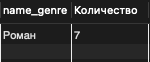

Пример на пересечение двух вложенных запросов

Условие: 
Сравнить ежемесячную выручку от продажи книг за текущий и предыдущий годы. Для этого вывести год, месяц, сумму выручки в отсортированном сначала по возрастанию месяцев, затем по возрастанию лет виде. Название столбцов: Год, Месяц, Сумма.

Решение: 
1)  создаем вложенный запрос на 2020 год:
- выделяем в отдельные столбцы год, месяц и выручку (произведение числа продажи на цену)
- группируем по месяцу и году, считаем сумму , забираем ее в отдлельный столбец

2) аналогично делаем для 2019

3) пересекаем их по совпадению месяцев
Тут могут быть варианты, например, в каком-то году в конкретном месяце может выручка отсутствовать (был ремонт, пожар и пр), а в другом году выручка была. 
и это условие можно победить пересечением left outer + rigth outer 
я этого делать не стал, потому что увидел, что совпадение полное - 2 и 3 месяцы.




In [ ]:
select month_pay, month_revenue_2019, month_revenue_2020 from 
	
    -- вложенный запрос за 2020 год
	(select year_pay, month_pay, sum(revenue) as month_revenue_2019
	from 
		(select bb.buy_id, price, bb.amount, step_id, date_step_end,
		year(date_step_end) as year_pay, month(date_step_end) as month_pay,
		price * bb.amount as revenue

	from 
		buy_book as bb inner join buy_step as bs using(buy_id)
		inner join book using(book_id)
		
	where step_id =1 and date_step_end is not null
		
		order by bb.buy_id, step_id) as temp_table_2

	group by month_pay, year_pay) as rev_2020

inner join 

	-- вложенный запрос за 2019 год
	(select year_pay, month_pay, sum(revenue) as month_revenue_2020
		from (
		select
		YEAR(date_payment) as year_pay, month(date_payment) as month_pay,
		price * amount as revenue
	from buy_archive) as temp_table

	group by month_pay, year_pay) as rev_2019

using(month_pay)	-- пересекаем по названию месяца

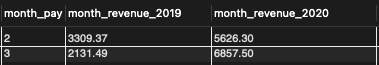

Объдинить продажи каждой книги по всем годам - узнать количество и сумму

In [ ]:
select title, Количество, Сумма 
from 
-- запрос всех книг, у которы
	(-- запрос всех проданных книг 2019 года, расчет числа книг и прибыли
        select book_id, sum(amount) as Количество, sum(amount * price)	as Сумма 
	from
		(select book_id, amount , price 
		from buy_archive 

		union all       -- объединяется

    -- запрос всех книг 2020 года с условием, что книга именно продана! 
		select book_id, bb.amount as amount, price
	from 
		buy_book as bb inner join book using(book_id)
		inner join buy_step using(buy_id)
		-- условие, что книга оплачена
		where step_id =1 and date_step_end is not null ) as union_table
		

	group by book_id    -- группируем по книге, чтобы считать общую сумму прибыли по каждой книге
	) as temp_table_2
    
    inner join book using(book_id)  -- объединяем полученную таблицу с book, чтобы получить имя каждой книги
    
	order by Сумма desc 



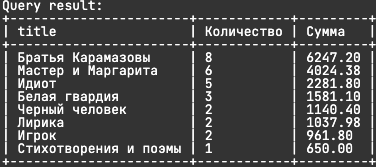

Пример на создание таблиц из данных других таблиц:

создать счет на оплату, в котором будет указаны книги, автор, цена, количество и стоимость

In [ ]:
create table buy_pay as 
    select title, name_author,book.price, bb.amount, book.price*bb.amount as Стоимость
    from author inner join book using(author_id)
    inner join buy_book as bb using(book_id)
    where bb.buy_id = 5
    order by title

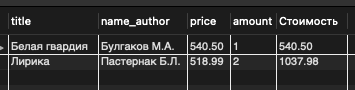

In [ ]:
# cоздать на его основе счет на оплату с итоговой стоиомстью

create table buy_pay as 
	select buy_id, sum(amount) as Количество, sum(Стоимость)
    from
		(select buy_id, title, name_author,book.price, bb.amount as amount, book.price*bb.amount as Стоимость
		from author inner join book using(author_id)
		inner join buy_book as bb using(book_id)
		where bb.buy_id = 5
		order by title) as temp_table
    group by buy_id;

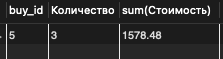

Включить несколько значений из другой таблицы одним запросом

Пример: В таблицу buy_step для заказа с номером 5 включить все этапы из таблицы step, которые должен пройти этот заказ. В столбцы date_step_beg и date_step_end всех записей занести Null

Решение: Все этапы в таблицу buy_step можно вставить одним запросом, для этого используется соединение CROSS JOIN для таблиц buy и step.

In [ ]:
insert into buy_step(buy_id, step_id)
select buy_id, step_id
from buy cross join step 
    
    where buy_id = 5;

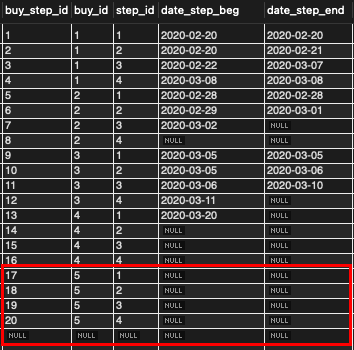

Пример на подсчет уникальных вхождений в столбце

Посчитать уникальное количество студентов, слушавших лекции какого-то предмета

In [ ]:
select name_subject, count(distinct student_id) as Количество
from subject left outer join attempt using(subject_id)
group by name_subject
order by name_subject

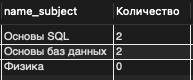

Хороший пример на выборку рандомных элементов , но при этом если количество их строго ограничено:

+ выбрать 3 случайных вопроса по предмету "Основы баз данных"

In [ ]:
select question_id, name_question
from subject inner join question using(subject_id)
where name_subject = "Основы баз данных"

order by rand()
limit 3

-- результат каждый раз будет разным


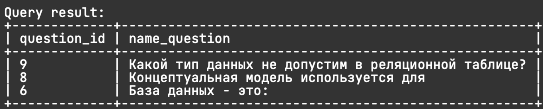

Посчитать результаты тестирования. Результат попытки вычислить как количество правильных ответов, деленное на 3 (количество вопросов в каждой попытке) и умноженное на 100. Результат округлить до двух знаков после запятой. Вывести фамилию студента, название предмета, дату и результат. Последний столбец назвать Результат. Информацию отсортировать сначала по фамилии студента, потом по убыванию даты попытки.

In [ ]:
select name_student, name_subject, date_attempt, Результат 

from (
	select attempt_id, round(sum(is_correct)/3*100,2) as Результат  
	from testing inner join answer using(answer_id)
	group by attempt_id) as temp

inner join attempt using(attempt_id)    
inner join subject using(subject_id)
inner join student using(student_id)

order by name_student, date_attempt desc

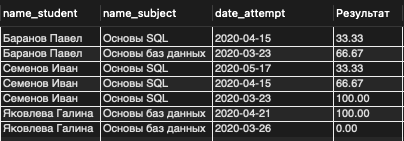

#### Переменные в SQL-запросах

Задать переменную можно используя синтаксис

In [ ]:
SET @row_num := 1;  -- присвоили ей значение

In [ ]:
-- на основе этого можно пронумеровать строки таблицы

SET @row_num := 0;

SELECT *, (@row_num := @row_num + 1) AS str_num
FROM  applicant_order;

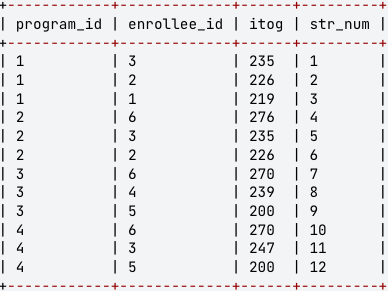

In [ ]:
-- или пронумеровать КАЖДУЮ программу отдельно!

SET @num_pr := 0;
SET @row_num := 1;

SELECT *, 
     if(program_id = @num_pr, @row_num := @row_num + 1, @row_num := 1) AS str_num,
     @num_pr := program_id AS add_var 
from applicant_order;

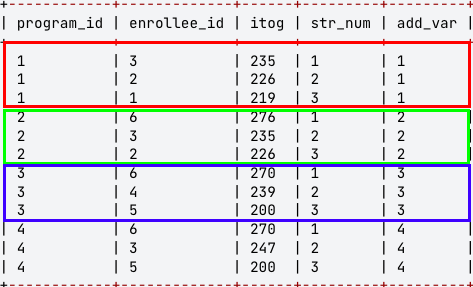

А вот обновление таблицы (запись номеров строк) выполняется через объединение с вложенным запросом

В качестве условия соединения таблицы и вложенного запроса после ключевого слова   указать, что id программ в таблице applicant_order и во вложенном запросе совпадают, а также id абитуриентов в таблице applicant_order и во вложенном запросе совпадают.

In [ ]:
SET @num_pr := 0;
SET @row_num := 1;


update applicant_order as ao inner join 
(SELECT *, 
     if(program_id = @num_pr, @row_num := @row_num + 1, @row_num := 1) AS str_ide,
     @num_pr := program_id AS add_var 
from applicant_order) as temp
on ao.program_id = temp.program_id and ao.enrollee_id = temp.enrollee_id

set ao.str_id = temp.str_ide;


select * from applicant_order; -- здесь уже выведем ИЗМЕНЕННУЮ таблицу после выполнения всех запросов



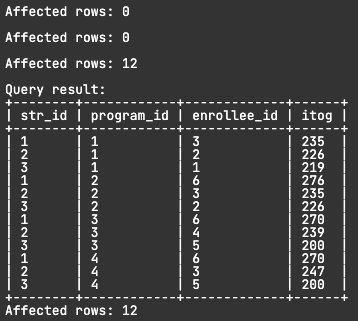

Рекомендовать тех учеников, которые имеют больше всех баллов в соответствии с ПЛАНОМ приема 

+ проще говоря, по баллам проходят 5 человек, но по плану принять только троих 
+ значит нужно выбрать только трех лучших по конкретной программе

+ и так сделать по КАЖДОЙ программе


План действий:

+ у нас есть пронумерованная таблица аббитуриентов по каждой программе, отсортированных по суммарному баллу

+ остается только присоединить данные по плану и взять в каждой программе не более планового количества взять лучших

+ а это сделать так - завести столбец is_recommended , значения 0 и 1 по условию: если НОМЕР аббитуриента в какой-либо программе меньше планового числа - взять 1 (рекомендован), если Номер больше - значит он уже не числе счастливчиков

In [ ]:
create table student as 
select name_program, name_enrollee, itog
from
	(select name_program, name_enrollee, itog
    from
		(SELECT *, 
			 if(str_id > plan, 0, 1) AS is_recommended

		from (
			select str_id,plan, itog, program_id,enrollee_id,name_enrollee,name_program 
			from applicant_order inner join enrollee using(enrollee_id)
			inner join program using(program_id)
			order by program_id, itog desc) as temp
			 ) as temp2
	where is_recommended =1) as temp3
             
order by name_program, itog desc;

select * from student;

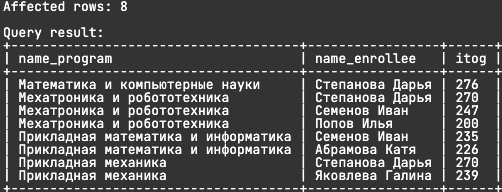

Магазин счёл, что классика уже не пользуется популярностью, поэтому необходимо в выборке:

1. Сменить всех авторов на "Донцова Дарья".

2. К названию каждой книги в начале дописать "Евлампия Романова и " ( пробел в конце).

3. Цену поднять на 42% (округлить её до двух знаков после запятой).

4. Отсортировать по убыванию цены.

In [ ]:
create table if not exists testbook as
select name_author as author, title, price
from (
	select name_author, title, price
    from author inner join book using(author_id)) as temp;
    
SET SQL_SAFE_UPDATES = 0;
update testbook
set 
	title = concat(
			(select 'Евлампия Романова и ' as new_title),       # соединить строки, конкатенация строк, сложить строки
            title),
	author = 'Донцова Дарья',
    price = round(price * 1.42, 2);
    
select * from testbook;

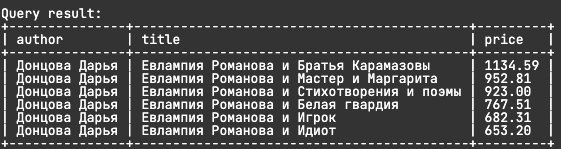

In [ ]:
select name_genre, amount from
 (select genre_id, count(title) as amount
  from buy_book inner join book using(book_id)
  group by genre_id
  having amount = 
    (select min(amount) from    
        (select genre_id, count(title) as amount
        from buy_book inner join book using(book_id)
        group by genre_id) as temp
     )
	) as tem2
    
  inner join genre using(genre_id)